In [0]:
!pip install nsepy

In [0]:
import datetime
import nsepy
import pandas as pd
import numpy as np
import pytest
import statsmodels
import matplotlib.pyplot as plt


%matplotlib inline

Part 1

In [0]:
INFY = nsepy.get_history(symbol='INFY',
                    start=datetime.date(2015,1,1), 
                    end=datetime.date(2016,1,10))
TCS = nsepy.get_history(symbol='TCS',
                    start=datetime.date(2015,1,1), 
                    end=datetime.date(2016,1,10))


In [0]:
INFY.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [0]:
TCS.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [0]:
nifty_IT = nsepy.get_history(symbol="NIFTY IT", 
                    start=datetime.date(2015,1,1), 
                    end=datetime.date(2016,1,10),
					index=True)
nifty_IT.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [0]:
print(len(INFY))
print(len(TCS))
print(len(nifty_IT))

254
254
254


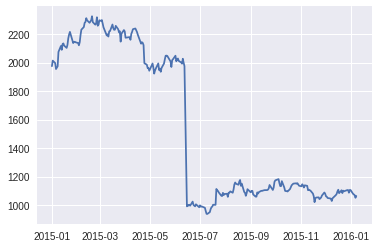

In [0]:
plt.plot(INFY.Close)

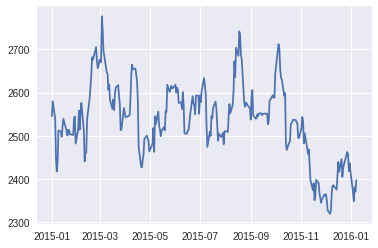

In [0]:
plt.plot(TCS.Close)

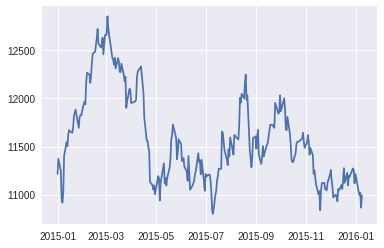

In [0]:
plt.plot(nifty_IT.Close)

In [0]:
#win  is window size
def SMA(df, win):
#   rolling_mean = df.y.rolling(window=7).mean()
  rolling_mean = df.Close.rolling(window=win).mean()
  s = 'AMD ' +str(win)+ ' Day EMA'
  plt.figure(figsize=(15, 5))
  plt.plot(df.Close, label='AMD')
  plt.plot(rolling_mean, label=s, color='orange')
  
  plt.legend(loc='upper left')
  plt.show()

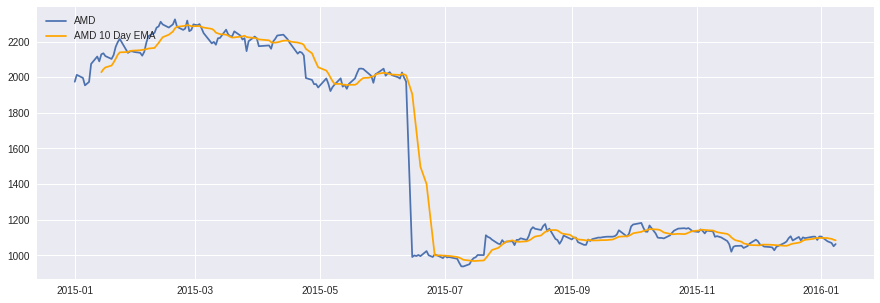

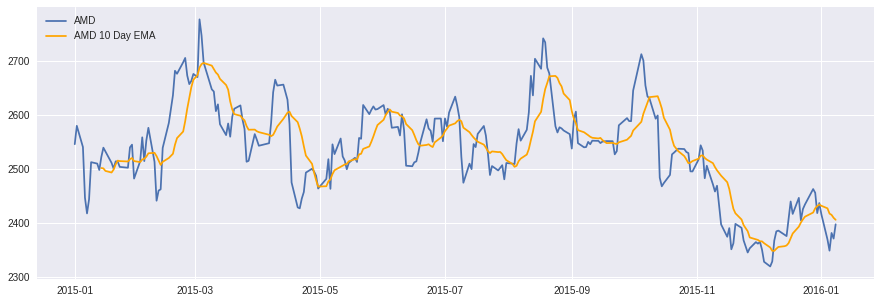

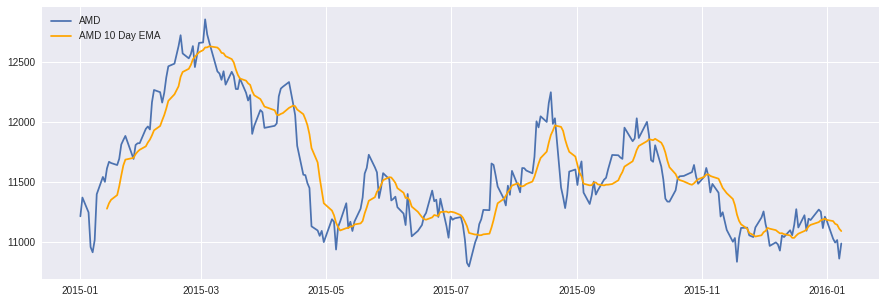

In [0]:
# second parameter to set window size
SMA(INFY,10)
SMA(TCS,10)
SMA(nifty_IT,10)

In [0]:
def EMA(df, win):
  exp1 = df.Close.ewm(span=win, adjust=False).mean()
  plt.figure(figsize=(15, 5))
  plt.plot(df.Close, label='AMD')
  s = 'AMD ' +str(win)+ ' Day EMA'
  plt.plot(exp1, label=s, color='orange')
  
  plt.legend(loc='upper left')
  plt.show()

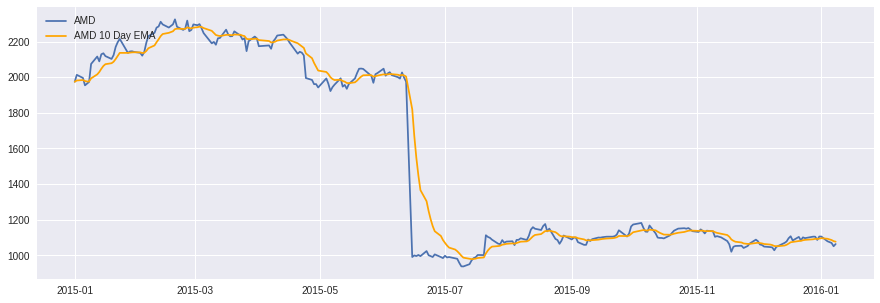

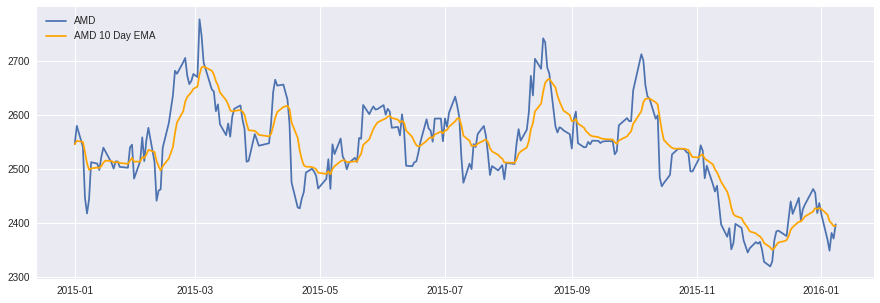

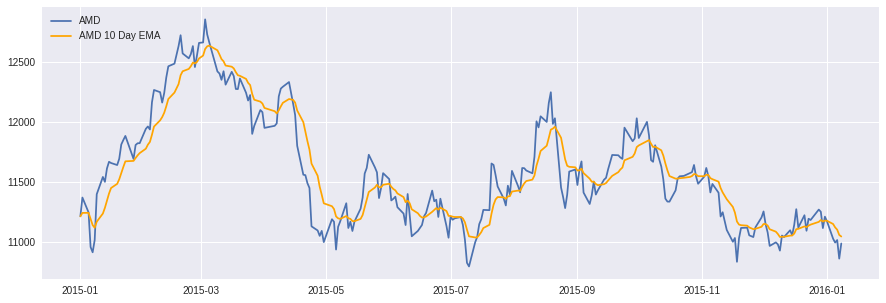

In [0]:
# second parameter to set window size
EMA(INFY,10)
EMA(TCS,10)
EMA(nifty_IT,10)

In [0]:
def rolling_window(df, win):
  SEQ = []
  x = []
  for i in range(0,len(df)):
    
    x.append(df.iloc[i].Close)
    if(len(x)==win):
      SEQ.append(x)
      x = x[1:]
  return SEQ 

In [0]:
infy_rolling_window = np.array(rolling_window(INFY, 10))
tcs_rolling_window = np.array(rolling_window(TCS, 10))
nifty_rolling_window = np.array(rolling_window(nifty_IT, 10))
print(infy_rolling_window.shape)
print(tcs_rolling_window.shape)
print(nifty_rolling_window.shape)

(245, 10)
(245, 10)
(245, 10)


In [0]:
def volume_shock(df):
  
  x = []
  y = []
  z = []
  x.append(0)
  y.append(0)
  z.append(0)
  for i in range(1, len(df)):
    if(abs(df.iloc[i-1].Volume - df.iloc[i].Volume)>(0.1*df.iloc[i-1].Volume)):
      x.append(1)
      if(df.iloc[i-1].Volume > df.iloc[i].Volume):
        y.append(0)
        z.append(1)
      else:
        y.append(1)
        z.append(0)
    else:
      x.append(0)
      y.append(0)
      z.append(0)
  return x,y,z

In [0]:
x, y, z = volume_shock(INFY)

INFY['Volume shock'] = np.array(x)
INFY['volume direction increase'] = np.array(y)
INFY['volume direction decrease'] = np.array(z)

In [0]:
x, y, z = volume_shock(TCS)
TCS['Volume shock'] = np.array(x)
TCS['volume direction increase'] = np.array(y)
TCS['volume direction decrease'] = np.array(z)

In [0]:
x, y, z = volume_shock(nifty_IT)
nifty_IT['Volume shock'] = np.array(x)
nifty_IT['volume direction increase'] = np.array(y)
nifty_IT['volume direction decrease'] = np.array(z)

In [0]:
INFY.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume shock,volume direction increase,volume direction decrease
Date,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,0,0,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,1,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,1,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,0,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,0,1


In [0]:
TCS.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume shock,volume direction increase,volume direction decrease
Date,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,0,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,1,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,1,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,1,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,0,0


In [0]:
nifty_IT.head()

,Open,High,Low,Close,Volume,Turnover,Volume shock,volume direction increase,volume direction decrease
Date,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,0,0,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,1,1,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,1,0,1
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,1,1,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,1,0,1


In [0]:
def price_shock(df):
  
  x = []
  y = []
  z = []
  
  for i in range(len(df)):
    if(abs(df.iloc[i]['Prev Close']-df.iloc[i].Close)>(0.02*df.iloc[i]['Prev Close'])):
      x.append(1)
      if(df.iloc[i]['Prev Close'] > df.iloc[i].Close):
        y.append(0)
        z.append(1)
      else:
        y.append(1)
        z.append(0)
    else:
      x.append(0)
      y.append(0)
      z.append(0)
  return x,y,z

Part 2: Data Visualization

In [0]:
x, y, z = price_shock(INFY)

INFY['price shock'] = np.array(x)
INFY['price direction increase'] = np.array(y)
INFY['price direction decrease'] = np.array(z)

In [0]:
x, y, z = price_shock(TCS)

TCS['price shock'] = np.array(x)
TCS['price direction increase'] = np.array(y)
TCS['price direction decrease'] = np.array(z)

In [0]:
from bokeh.plotting import figure, show
from bokeh.io import show, output_notebook

In [0]:
def shock_line(p, df):
  x=[]
  
  flag=0
  
  for i in range(len(df)):
    if(df.iloc[i]['Volume shock']==1):
      x.append(i)
    if(len(x)==2):
      pri = df.iloc[x[0]:x[1]+1].Close.values
      day = [i for i in range(x[0], x[1]+1)]
      p.line(day, pri, color='red')
      x=[]
    
    
      
  
  
      
  

In [0]:
def mark_line(p, df):
  x=[]
  y = []
  
  
  for i in range(len(df)):
    if(df.iloc[i]['price shock']==1 and df.iloc[i]['Volume shock']==0):
      x.append(i)
      y.append(df.iloc[i]['Close'])
      
      
  p.circle(x, y, size=10, color='green') 
    
      
  
  
      
  

In [0]:
def plot_line(df):
  pri = list(x for x in df["Close"])
  day = [x for x in range(len(df))]
  output_notebook()
  p = figure(plot_height=300, plot_width=800)
  p.line(day, pri)
  shock_line(p, df)
  mark_line(p, df)
  show(p)

In [0]:
plot_line(INFY)

Loading BokehJS ...

In [0]:
plot_line(TCS)

Loading BokehJS ...

In [0]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(df):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLOT {}" .format(df.iloc[0]['Symbol']))

    partial_autocorr = pacf(df["Close"], nlags=lags)
    p.vbar(x, top=partial_autocorr,width=1)
    show(p)

In [0]:
output_notebook()

draw_pacf(INFY)
draw_pacf(TCS)


Loading BokehJS ...

Part 3 : Data modelling

In [0]:
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [0]:
df = TCS[['Close']]

In [20]:
forecast_out = int(1) 
df['Prediction'] = df[['Close']].shift(-forecast_out)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [0]:
from sklearn import model_selection

X_forecast = X[-forecast_out:] 
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [0]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

Linear Regression

In [36]:
clf = LinearRegression()
mse_train ,mse_test = calc_metrics(X_train, y_train, X_test, y_test, clf)
print("Train RMSE : ", mse_train)
print("Test RMSE : ", mse_test)

Train RMSE :  31.025556485923723
Test RMSE :  36.024286287659905


Ensemble Model

In [46]:
est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
mse_train ,mse_test = calc_metrics(X_train, y_train, X_test, y_test, est)
print("Train RMSE : ", mse_train)
print("Test RMSE : ", mse_test)

Train RMSE :  27.204360558215637
Test RMSE :  37.45147566001725


Linear regression is providing better test performance

Improving the model

In [0]:
X_intermediate, X_test, y_intermediate, y_test = model_selection.train_test_split(X, y, shuffle=True,test_size=0.2, random_state=15)

X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_intermediate, y_intermediate,shuffle=False,test_size=0.25,random_state=2018)

In [51]:
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(y),2),round(len(y_validation)/len(y),2),
                                                       round(len(y_test)/len(y),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [55]:
from sklearn.linear_model import Ridge
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    new_validation_error = np.sqrt(mean_squared_error(y_validation, ridge.predict(X_validation)))
    new_test_error = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 30.51 | val error: 34.123 | test error: 34.429
alpha:    0.01 | train error: 30.51 | val error: 34.124 | test error: 34.429
alpha:     0.1 | train error: 30.51 | val error: 34.127 | test error: 34.423
alpha:       1 | train error: 30.515 | val error: 34.165 | test error: 34.369
alpha:      10 | train error: 30.949 | val error: 34.865 | test error: 34.194


In [0]:
# train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=15)

# instantiate model
ridge = Ridge(alpha=0.11, fit_intercept=True, random_state=99)

# fit and calculate errors
new_train_error, new_test_error = calc_metrics(X_train, y_train, X_test, y_test, ridge)
new_train_error, new_test_error = round(new_train_error, 3), round(new_test_error, 3)

In [59]:
print('ORIGINAL ERROR')
print('-' * 40)
print('train error: {} | test error: {}\n'.format(mse_train, mse_test))
print('ERROR w/REGULARIZATION')
print('-' * 40)
print('train error: {} | test error: {}'.format(new_train_error, new_test_error))

ORIGINAL ERROR
----------------------------------------
train error: 27.204360558215637 | test error: 37.45147566001725

ERROR w/REGULARIZATION
----------------------------------------
train error: 31.439 | test error: 34.651


Linearity & Equal variance assumption test for Linear regression

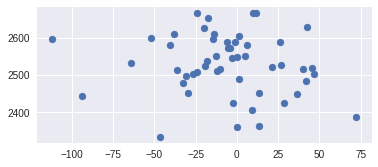

In [60]:
y_pred_ridge = ridge.predict(X_test)
residual = y_test - y_pred_ridge
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_pred_linear)

It seems like the corresponding residual plot is reasonably random. 

Residual Plot

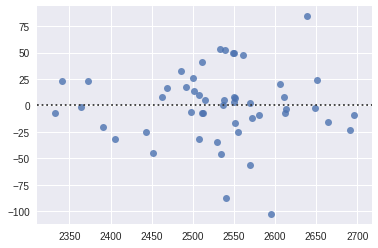

In [61]:

sns.residplot(y_pred_ridge, residual)

By this plot we can conclude that there is no heteroscedasticity.

Test for normality

0.9615170409757986

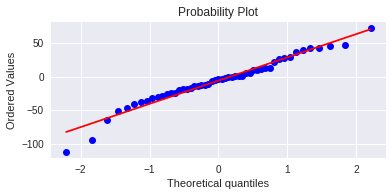

In [62]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2


Pytest for test cases

In [0]:
import pytest

In [0]:
def test_case(x, y, model, rmse):
  y_pred_ts = model.predict(x)
  for i in range(len(y_pred_ts)):
    try:
      assert abs(y_pred_ts[i] - y[i]) <=rmse
    except:
      print("Error term : ",abs(y_pred_ts[i] - y[i]))
      print("RMSE : ", rmse)

In [74]:
x_test_case = X_test[:5]
y_test_case = y_test[1:6]

test_case(x_test_case, y_test_case, ridge, new_test_error)

Error term :  93.10763862256044
RMSE :  34.651
Error term :  293.4208300964874
RMSE :  34.651
Error term :  116.17728532991487
RMSE :  34.651
Error term :  112.6447715764998
RMSE :  34.651
Error term :  72.0629721689088
RMSE :  34.651
